### Load the csv as Pandas DataFrame

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df_train = pd.read_csv("../data/fraudTrain.csv")
df_test = pd.read_csv("../data/fraudTrain.csv")

### Check format and Combine csv files

In [4]:
# See if two datasets' format
status = "is" if df_test.equals(df_train) else "is not"
print(f"Training Data and Testing Data format {status} same!!!")
# Combine both datasets
df_combined = pd.concat([df_train, df_test], ignore_index=True)

Training Data and Testing Data format is same!!!


### General Information

In [5]:
# Get an overview of the dataset
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593350 entries, 0 to 2593349
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

### Check Missing Value

In [7]:
# Check each column missing values
missing_value = df_combined.isnull().sum()
print("Missing Values in Each Column in Test Data:")
print(
    missing_value[missing_value > 0]
    if missing_value[missing_value > 0].any() == True
    else None
)

Missing Values in Each Column in Test Data:
None


### Summary statistics

In [8]:
summary_statistics = df_combined.iloc[:, 2:].describe()
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
             cc_num           amt           zip           lat          long  \
count  2.593350e+06  2.593350e+06  2.593350e+06  2.593350e+06  2.593350e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075807e+00  1.375907e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  2.593350e+06  2.593350e+06  2.593350e+06  2.593350e+06  2.593350e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019563e+05  1.284128e+07 

### Visualize Numerical Data

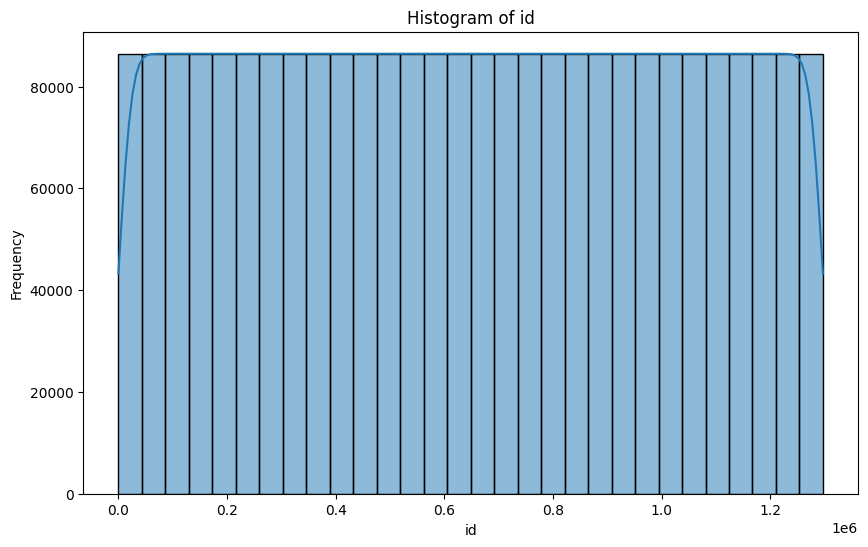

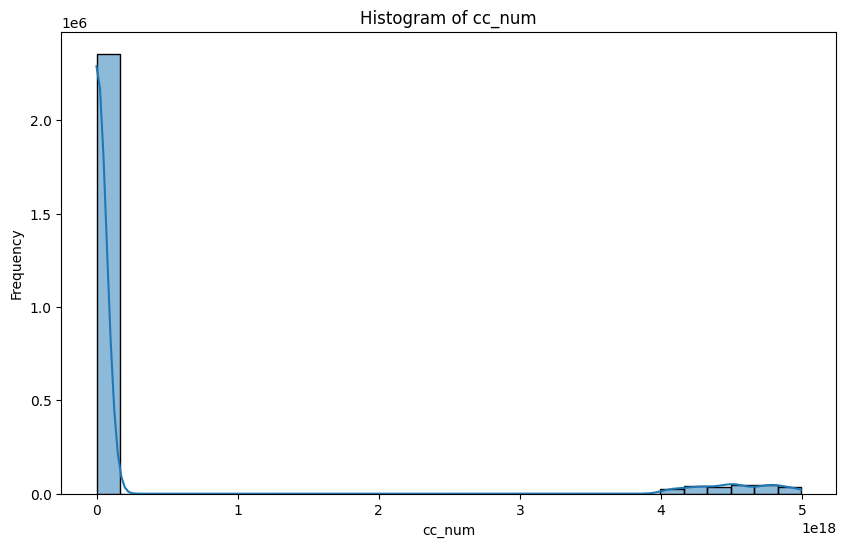

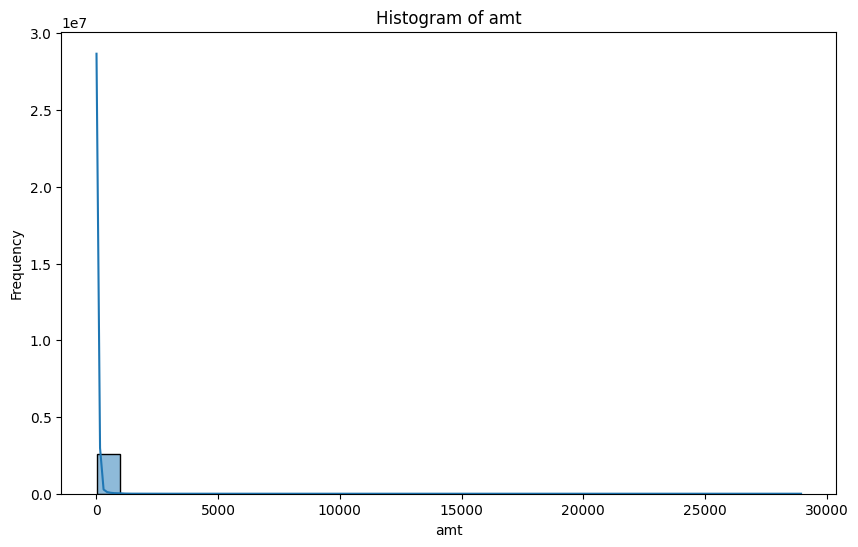

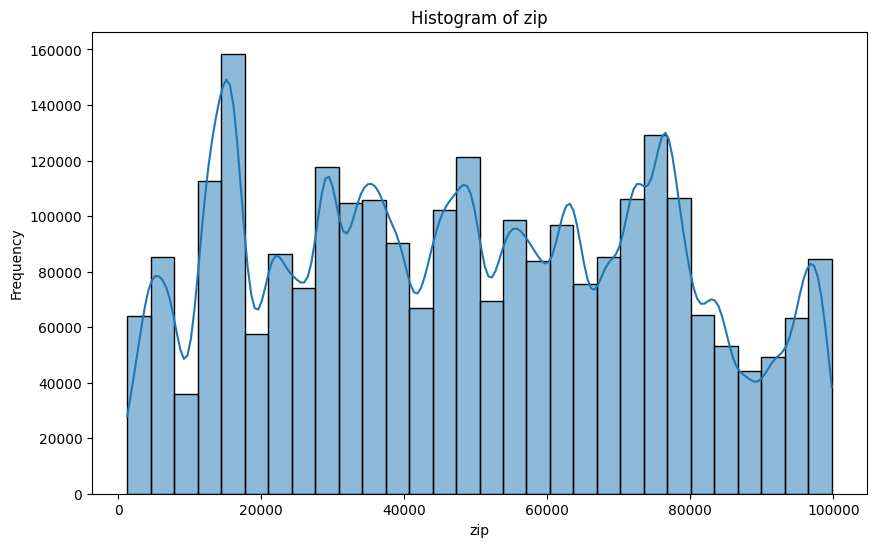

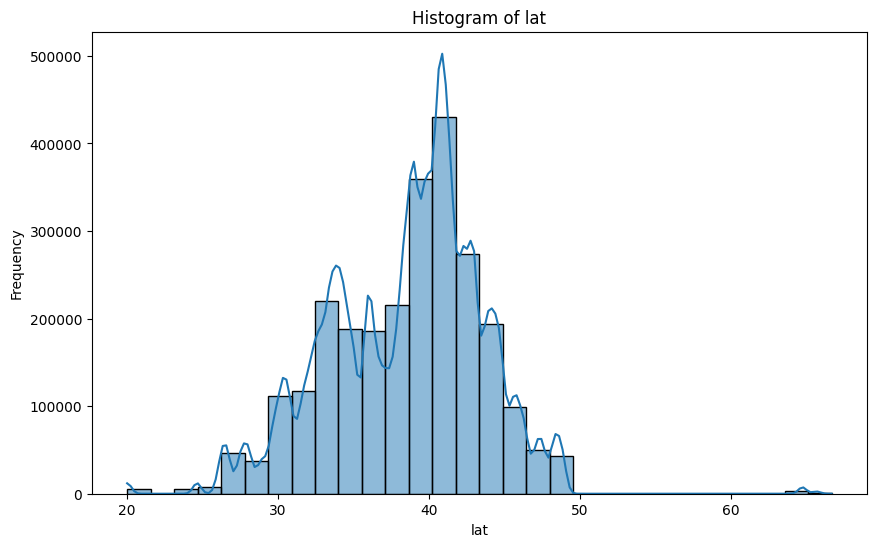

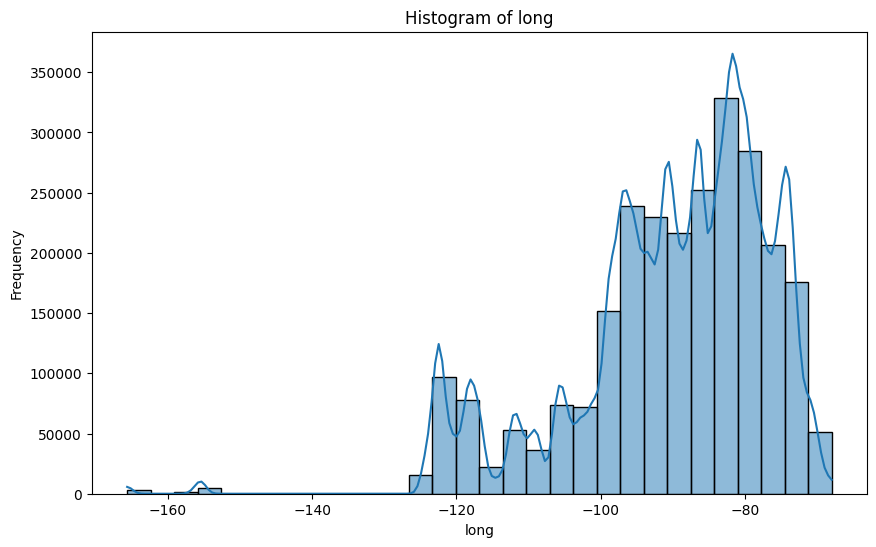

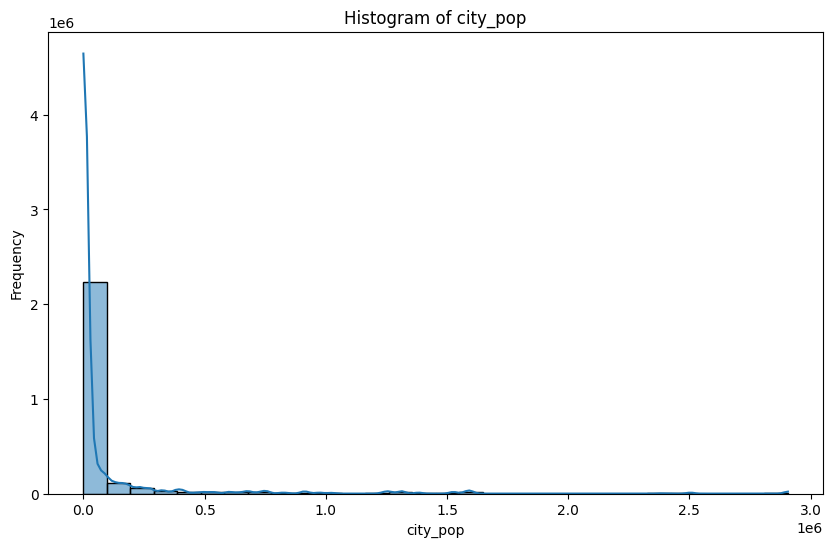

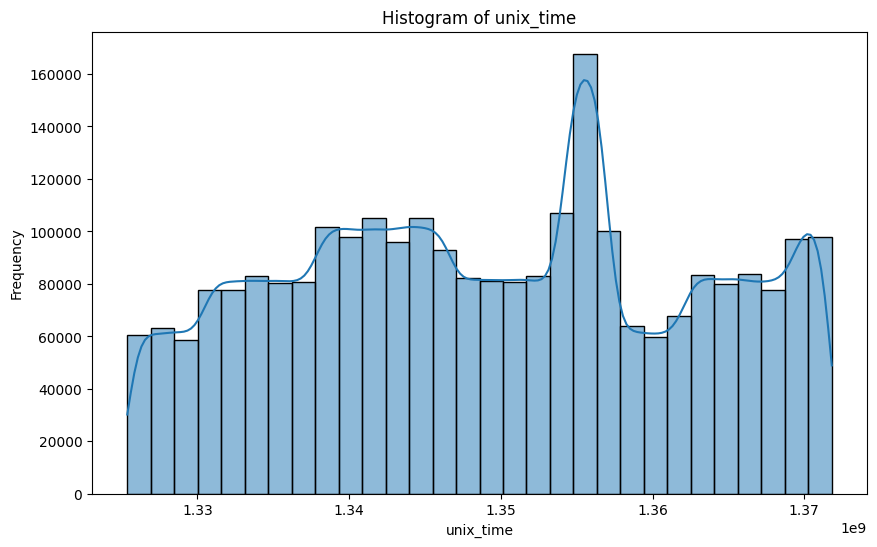

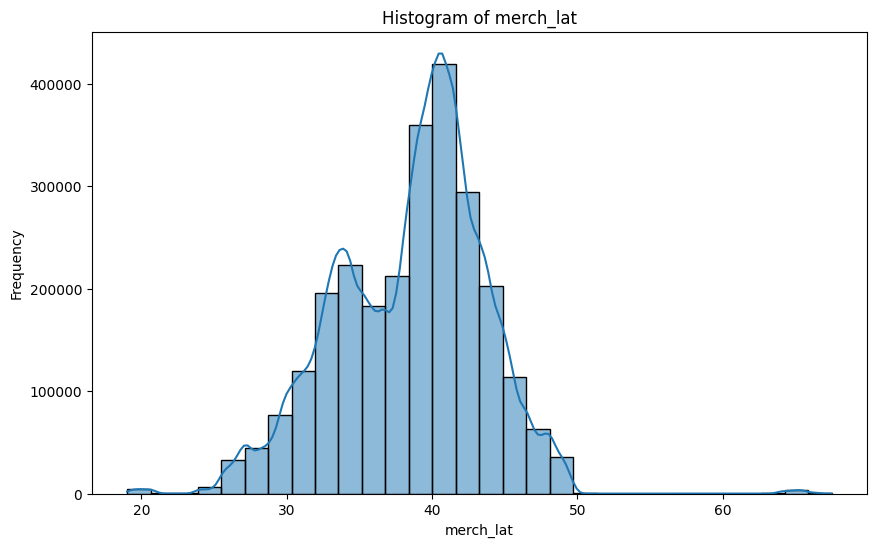

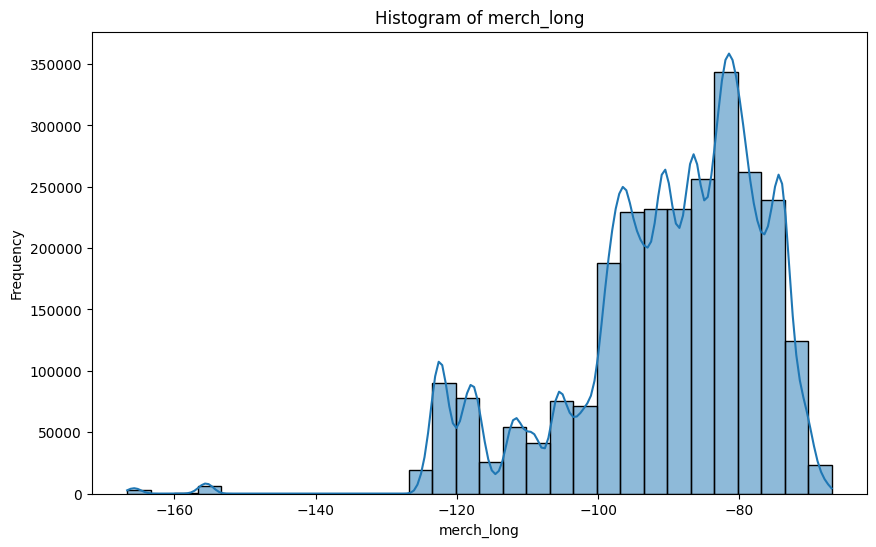

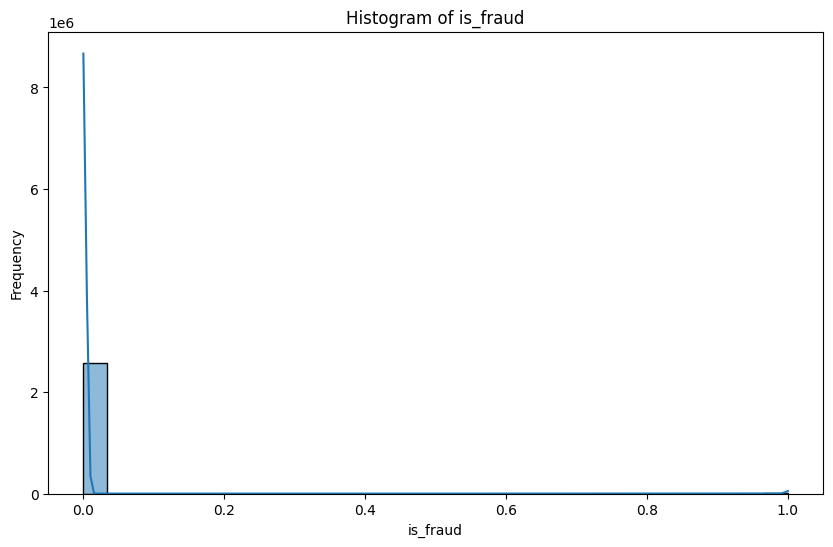

In [9]:
# Get the list of columns
numeric_columns = df_combined.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Create histograms for each column
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        df_combined[col], bins=30, kde=True
    ) 
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()